In [1]:
import coco_dataset
import pathlib
import show_utils
import matplotlib.pyplot as plt
from torchvision import transforms
import torch

In [2]:
inp_size = (368, 368)
targ_size = (46, 46)
coco_dataset = coco_dataset.CocoKeypoints(
    root=str(pathlib.Path("../coco") / "images" / "train2017"),
    annFile=str(
        pathlib.Path("../coco")
        / "annotations"
        / "annotations"
        / "person_keypoints_train2017.json"
    ),
    transform=transforms.Compose(
        [
            transforms.Resize((368, 368)),
            transforms.ToTensor(),
            transforms.ConvertImageDtype(torch.float32),
            transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225)),
        ]
    ),
)
i = 0

loading annotations into memory...
Done (t=5.91s)
creating index...
index created!


In [20]:
i=0

In [86]:
sample = coco_dataset[i]

tf_image, pafs, heatmaps, mask_out, keypoints, image, target = sample

show_utils.show_coco(image, target, coco_dataset.coco, draw_bbox=False)

# show_utils.show_tensors(mask_out)

plt.figure()
show_utils.show_heatmaps_combined(heatmaps)

plt.figure()
show_utils.show_heatmaps(heatmaps)

plt.figure()
show_utils.show_pafs(pafs)

# show_utils.show_pafs_quiver(pafs, size=targ_size)

plt.figure()
show_utils.show_pafs_quiver_combined(pafs, size=targ_size)

print(i)
i += 1

In [87]:
import post

In [88]:
people_parts = post.body_parser(image.size, heatmaps, pafs)

In [89]:
formated_keypoints = post.format_keypoints(people_parts)

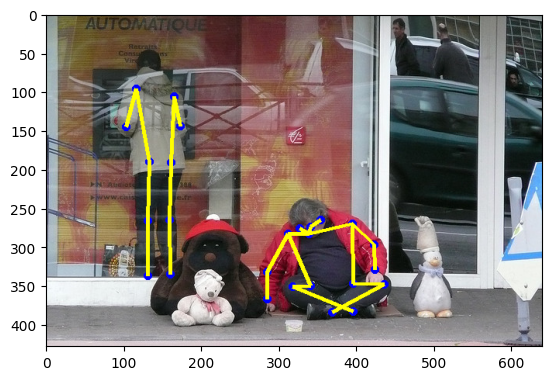

In [90]:
post.show_keypoints(image, formated_keypoints)